In [27]:
from qoc import grape_schroedinger_discrete
from qoc.standard import TargetStateInfidelity

import autograd.numpy as anp
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import dia_matrix

%matplotlib inline

In [28]:
def naive_Krylov(N, l):
    """
    This function contains a simple example of grape
    on the schroedinger equation using time discrete
    control parameters to evolve a cavity from the
    Fock state 0 to the Fock state 1. Even though the
    system is not physical, it can be used to measure
    memory

    Args:
    N :: int - Numbers of time steps
    l :: int - Hilbert space dimension
    """

    HILBERT_SIZE = l
    diagnol = np.arange(HILBERT_SIZE)
    up_diagnol = np.sqrt(diagnol)
    low_diagnol = np.sqrt(np.arange(1, HILBERT_SIZE + 1))
    data = [low_diagnol, diagnol, up_diagnol]
    offsets = [-1, 0, 1]
    H_SYSTEM_0 = dia_matrix((data, offsets), shape=(HILBERT_SIZE, HILBERT_SIZE))
    sigmax = dia_matrix(([low_diagnol, up_diagnol], [-1, 1]),
                        shape=(HILBERT_SIZE, HILBERT_SIZE))

    # Only real control amplitudes are supported!
    hamiltonian = lambda controls, time: (H_SYSTEM_0
                                          + controls[0] * sigmax)

    # Define the problem.
    CAVITY_VACUUM = anp.zeros((l, 1))
    CAVITY_ZERO = anp.copy(CAVITY_VACUUM)
    CAVITY_ZERO[0, 0] = 1
    CAVITY_ONE = anp.copy(CAVITY_VACUUM)
    CAVITY_ONE[1, 0] = 1
    CAVITY_VACUUM = anp.zeros((l, 1))

    INITIAL_STATE_0 = anp.copy(CAVITY_VACUUM)
    INITIAL_STATE_0[0,0] = 1
    TARGET_STATE_0 = anp.copy(CAVITY_VACUUM)
    TARGET_STATE_0[1,0] = 1
    INITIAL_STATES = anp.stack((INITIAL_STATE_0,), axis=0)
    TARGET_STATES = anp.stack((TARGET_STATE_0,), axis=0)
    COSTS = [TargetStateInfidelity(TARGET_STATES)]

    # Define the optimization.
    COMPLEX_CONTROLS = False
    CONTROL_COUNT = 1
    EVOLUTION_TIME = 1e-6  # nanoseconds
    CONTROL_EVAL_COUNT = SYSTEM_EVAL_COUNT = N + 1
    ITERATION_COUNT = 5

    # Define output.
    LOG_ITERATION_STEP = 1
    CONTROL_HAMILTONIAN = [sigmax]

    MANUAL_PARAMETER = {"control_hamiltonian": CONTROL_HAMILTONIAN,
                        "manual_gradient_mode": True, "tol": 1e-6}

    result = grape_schroedinger_discrete(CONTROL_COUNT, CONTROL_EVAL_COUNT,
                                         COSTS, EVOLUTION_TIME, hamiltonian,
                                         INITIAL_STATES, SYSTEM_EVAL_COUNT,
                                         complex_controls=COMPLEX_CONTROLS,
                                         iteration_count=ITERATION_COUNT,
                                         log_iteration_step=LOG_ITERATION_STEP,
                                         manual_parameter=MANUAL_PARAMETER)

In [29]:
def AD(N, l):
    """
    This function contains a simple example of grape
    on the schroedinger equation using time discrete
    control parameters to evolve a cavity from the
    Fock state 0 to the Fock state 1. Even though the
    system is not physical, it can be used to measure
    memory

    Args:
    N :: int - Numbers of time steps
    l :: int - Hilbert space dimension
    """

    HILBERT_SIZE = l
    diagnol = np.arange(HILBERT_SIZE)
    up_diagnol = np.sqrt(diagnol)
    low_diagnol = np.sqrt(np.arange(1, HILBERT_SIZE + 1))
    data = [low_diagnol, diagnol, up_diagnol]
    offsets = [-1, 0, 1]
    H_SYSTEM_0 = dia_matrix((data, offsets), shape=(HILBERT_SIZE, HILBERT_SIZE))
    sigmax = dia_matrix(([low_diagnol, up_diagnol], [-1, 1]),
                        shape=(HILBERT_SIZE, HILBERT_SIZE))

    H_SYSTEM_0 = anp.array(H_SYSTEM_0.toarray())
    sigmax = anp.array(sigmax.toarray())

    # Only real control amplitudes are supported!
    hamiltonian = lambda controls, time: (H_SYSTEM_0
                                          + controls[0] * sigmax)

    # Define the problem.
    CAVITY_VACUUM = anp.zeros((l, 1))
    CAVITY_ZERO = anp.copy(CAVITY_VACUUM)
    CAVITY_ZERO[0, 0] = 1
    CAVITY_ONE = anp.copy(CAVITY_VACUUM)
    CAVITY_ONE[1, 0] = 1
    CAVITY_VACUUM = anp.zeros((l, 1))

    INITIAL_STATE_0 = anp.copy(CAVITY_VACUUM)
    INITIAL_STATE_0[0,0] = 1
    TARGET_STATE_0 = anp.copy(CAVITY_VACUUM)
    TARGET_STATE_0[1,0] = 1
    INITIAL_STATES = anp.stack((INITIAL_STATE_0,), axis=0)
    TARGET_STATES = anp.stack((TARGET_STATE_0,), axis=0)
    COSTS = [TargetStateInfidelity(TARGET_STATES)]

    # Define the optimization.
    COMPLEX_CONTROLS = False
    CONTROL_COUNT = 1
    EVOLUTION_TIME = 1e-6  # nanoseconds
    CONTROL_EVAL_COUNT = SYSTEM_EVAL_COUNT = N + 1
    ITERATION_COUNT = 5

    # Define output.
    LOG_ITERATION_STEP = 1
    CONTROL_HAMILTONIAN = [sigmax]

    result = grape_schroedinger_discrete(CONTROL_COUNT, CONTROL_EVAL_COUNT,
                                         COSTS, EVOLUTION_TIME, hamiltonian,
                                         INITIAL_STATES, SYSTEM_EVAL_COUNT,
                                         complex_controls=COMPLEX_CONTROLS,
                                         iteration_count=ITERATION_COUNT,
                                         log_iteration_step=LOG_ITERATION_STEP,)

In [32]:
# naive Krylov output
h_dims = range(10, 1000, 100)
ktimes = []
for dim in h_dims:
    kstart = time.time()
    naive_Krylov(5, dim)
    kend = time.time()

    ktime = kend-kstart
    ktimes.append(ktime)

iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total

In [33]:
# AD output
adtimes = []
for dim in h_dims:
    adstart = time.time()
    AD(5, dim)
    adend = time.time()

    adtime = adend-adstart
    adtimes.append(adtime)

iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total

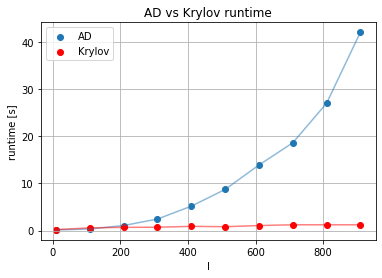

In [34]:
plt.scatter(h_dims, adtimes, color='C0', label="AD")
plt.plot(h_dims, adtimes, color='C0', alpha = 0.5)

plt.scatter(h_dims, ktimes, color='r', label="Krylov")
plt.plot(h_dims, ktimes, color='r', alpha = 0.5)

plt.xlabel("l")
plt.ylabel("runtime [s]")

plt.title("AD vs Krylov runtime")
plt.grid()
plt.legend()

plt.show()

In [35]:
print(ktimes)
print(adtimes)

[0.1898491382598877, 0.5633950233459473, 0.6736938953399658, 0.6977560520172119, 0.8792262077331543, 0.8070337772369385, 1.0527050495147705, 1.2177798748016357, 1.209434986114502, 1.2146077156066895]
[0.12549805641174316, 0.3137378692626953, 1.0548009872436523, 2.440361976623535, 5.16273307800293, 8.718554973602295, 13.897977113723755, 18.615697145462036, 27.014513731002808, 42.077934980392456]
